# Sistemas Inteligentes

## Laboratório 3 - Redução de Dimensionalidade e Regressão

Algoritmos de Redução de dimensionalidade:
- Principal Component Analysis (PCA)
- Independent Component Analysis (ICA)
- Isometric Mapping (Isomap)
- T-Distributed Stochastic Neighbor Embedding (TSNE)

Modelos de regressão linear:
- Least Squares
- Ridge
- Lasso
- Lasso Least-angle regression (LARS)
- RANdom SAmple Consensus (RANSAC)
- Theil-Sen

### Identificação do Aluno

#### Nome Completo

William de Souza Gomes

#### RA

11201720874

## Importação e preparação dos dados

Importe o dataset de pacientes diabéticos da biblioteca Scikit (load_diabetes) e separe os dados entre atributos (X) e saídas (y).

In [1]:
from sklearn.datasets import load_diabetes
db = load_diabetes()
X = db.data
y = db.target

Mostre os formatos da variável de atributos e da variável de saídas.

In [2]:
X.shape
#X[0]

(442, 10)

In [3]:
y.shape
#y[0]

(442,)

## Redução de Dimensionalidade

Importe e aplique as funções de redução de dimensionalidade (PCA, FastICA, Isomap e TSNE) para reduzir a dimensionalidade a apenas uma feature.

In [4]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap, TSNE  

pca = PCA(n_components=1)
pca = pca.fit_transform(X)

fast_ica = FastICA(n_components = 1)
fast_ica = fast_ica.fit_transform(X)

isomap = Isomap(n_components=1)
isomap = isomap.fit_transform(X)

tsne = TSNE(n_components=1)
tsne = tsne.fit_transform(X)

Mostre o formato da nova variável de atributos após a redução de dimensionalidade para cada algoritmo.

In [5]:
pca.shape

(442, 1)

In [6]:
fast_ica.shape

(442, 1)

In [7]:
isomap.shape

(442, 1)

In [8]:
tsne.shape

(442, 1)

### Caso mais simples

Faça a separação dos dados para treinamento e teste. Reserve 20% dos dados para teste.

In [9]:
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca, y, test_size = .20)

#X_train_fastIca, X_test_fastIca, y_train_fastIca, y_test_fastIca = train_test_split(fast_ica, y, test_size = .20)

#X_train_isomap, X_test_isomap, y_train_isomap, y_test_isomap = train_test_split(isomap, y, test_size = .20)

#X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(tsne, y, test_size = .20)

Importe o regressor linear e utilize-o para gerar um modelo, então faça uma regressão com os dados de teste.

In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_pca, y_train_pca)

y_pred_cpa = reg.predict(X_test_pca)

Importe as funções de erro quadrático médio (MSE) e o coeficiente de determinação (R²), então imprima o MSE e o R².

In [11]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

print('mean squared error: {} '.format(round(mse(y_pred_cpa, y_test_pca), 2)))
print('R2: {}'.format(round(r2(y_test_pca, y_pred_cpa), 4)))  

mean squared error: 4810.06 
R2: 0.2632


Então exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada.

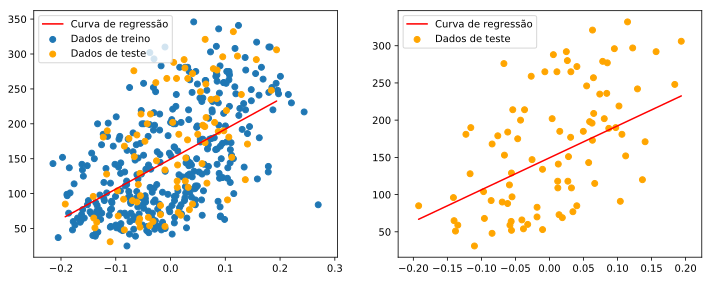

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [12, 10], 
          'axes.labelsize': 10,
          'axes.titlesize':10, 
          'font.size': 10,
          'legend.fontsize': 10, 
          'xtick.labelsize': 10, 
          'ytick.labelsize': 10
         }

plt.rcParams.update(params)

plt.subplot(221)
plt.scatter(X_train_pca,y_train_pca)
plt.scatter(X_test_pca,y_test_pca, c = 'orange')
plt.plot(X_test_pca, y_pred_cpa, 'r')
plt.legend(['Curva de regressão','Dados de treino', 'Dados de teste'])

plt.subplot(222)
plt.scatter(X_test_pca,y_test_pca, c = 'orange')
plt.plot(X_test_pca, y_pred_cpa, 'r')
plt.legend(['Curva de regressão','Dados de teste'])

plt.show()

### Comparando Métodos de Redução de Dimensionalidade

Agora, a fim de comparar com outras técnicas, crie um método iterativo que realize as etapas de separação dos dados entre treinamento e teste, gere um modelo de regressão linear, faça a predição com base nos dados de testes e calcule o erro quadrático médio e o coeficiente de determinação para cada iteração. Então, calcule os valores mínimo, médio, máximo e desvio padrão para cada uma dessas duas métricas. Por fim, plote os histogramas (com 100 bins) das duas métricas. Use 10000 (dez mil) iterações.

#### PCA

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

mse_list_pca = [];
r_2_list_pca = [];
for x in range(0, 10000):
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca, y, test_size = .20)
    reg = LinearRegression().fit(X_train_pca, y_train_pca)
    y_pred_pca = reg.predict(X_test_pca)
    
    mse_list_pca.append(mse(y_pred_pca, y_test_pca))
    r_2_list_pca.append(r2(y_test_pca, y_pred_pca))


## NOTA (Justificativa do R2 negativo)

#### Como fizemos um número alto de iterações, em um dado momento na separação dos dados de teste e dos dados de treino foram aleatórios de tal forma que a distrubuição não valorizou uma distribuição uniforme dos dados. Sendo muito diferente os dados de teste e de treino.
Fonte: https://stackoverflow.com/questions/23036866/scikit-learn-is-returning-coefficient-of-determination-r2-values-less-than-1

In [15]:
cont_neg = 0
for index, i in enumerate(r_2_list_pca):
    if i < 0:
        cont_neg += 1
        print("índice da lista c/ valor negativo: {}".format(index))
        r_2_list_pca[index] *= -1 
print("Total de R2 com valores negativos: {}".format(cont_neg))


índice da lista c/ valor negativo: 266
índice da lista c/ valor negativo: 702
índice da lista c/ valor negativo: 893
índice da lista c/ valor negativo: 938
índice da lista c/ valor negativo: 4325
índice da lista c/ valor negativo: 4806
índice da lista c/ valor negativo: 5044
índice da lista c/ valor negativo: 5181
índice da lista c/ valor negativo: 8960
índice da lista c/ valor negativo: 9627
Total de R2 com valores negativos: 10


In [16]:
from numpy import min, max, mean, median, var, std
from scipy.stats import mode

print('min MSE: {}'.format(round(min(mse_list_pca), 4)))
print('max MSE: {}'.format(round(max(mse_list_pca), 4)))
print('mean MSE: {}'.format(round(mean(mse_list_pca), 4)))
print('median MSE: {}'.format(round(median(mse_list_pca), 4)))
print('mode MSE: {}'.format(round(mode(mse_list_pca).mode[0], 4)))
print('var MSE: {}'.format(round(var(mse_list_pca), 4)))
print('std MSe: {}'.format(round(std(mse_list_pca), 4)))
print("\n")
print('min R2: {}'.format(round(min(r_2_list_pca), 4)))
print('max R2: {}'.format(round(max(r_2_list_pca), 4)))
print('mean R2: {}'.format(round(mean(r_2_list_pca), 4)))
print('median R2: {}'.format(round(median(r_2_list_pca), 4)))
print('mode R2: {}'.format(round(mode(r_2_list_pca).mode[0], 4)))
print('var R2: {}'.format(round(var(r_2_list_pca), 4)))
print('std R2: {}'.format(round(std(r_2_list_pca), 4)))

min MSE: 2656.7057
max MSE: 6024.9718
mean MSE: 4137.7677
median MSE: 4118.5658
mode MSE: 2656.7057
var MSE: 228629.8738
std MSe: 478.1526


min R2: 0.001
max R2: 0.4887
mean R2: 0.2927
median R2: 0.2991
mode R2: 0.001
var R2: 0.0051
std R2: 0.0716


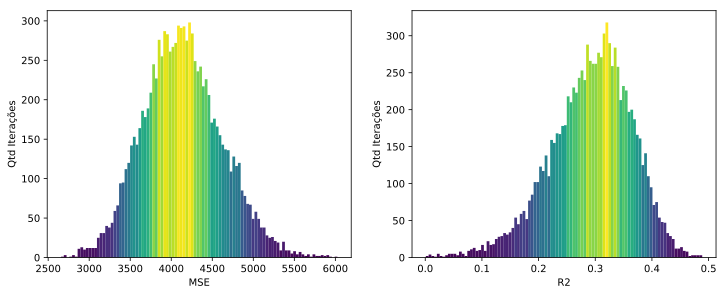

In [17]:
import matplotlib.colors

params = {'figure.figsize': [12, 10], 
          'axes.labelsize': 10,
          'axes.titlesize':10, 
          'font.size': 10,
          'legend.fontsize': 10, 
          'xtick.labelsize': 10, 
          'ytick.labelsize': 10
         }

plt.rcParams.update(params)


plt.subplot(221)
#Deixar Histograma colorido
N, bins, patches = plt.hist(mse_list_pca, bins = 100, orientation = 'vertical')
fracs = N/N.max()
norm = matplotlib.colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
#fim comando para deixar colorido
plt.xlabel('MSE')
plt.ylabel('Qtd Iterações')

plt.subplot(222)
#Deixar Histograma colorido
N, bins, patches = plt.hist(r_2_list_pca, bins = 100, orientation = 'vertical', histtype='bar')
fracs = N/N.max()
norm = matplotlib.colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
#fim comando para deixar colorido
plt.xlabel('R2')
plt.ylabel('Qtd Iterações')


plt.show()

#### ICA

In [18]:
mse_list_ica = []
r_2_list_ica = []
for x in range(0, 10000):
    X_train_fastIca, X_test_fastIca, y_train_fastIca, y_test_fastIca = train_test_split(fast_ica, y, test_size = .20)
    reg = LinearRegression().fit(X_train_fastIca, y_train_fastIca)
    y_pred_fastIca = reg.predict(X_test_fastIca)
    
    mse_list_ica.append(mse(y_pred_fastIca, y_test_fastIca))
    r_2_list_ica.append(r2(y_test_fastIca, y_pred_fastIca))

In [19]:
# Ajustando dados 
cont_neg = 0
for index, i in enumerate(r_2_list_ica):
    if i < 0:
        cont_neg += 1
        print("índice da lista c/ valor negativo: {}".format(index))
        r_2_list_ica[index] *= -1 
print("Total de R2 com valores negativos: {}".format(cont_neg))

índice da lista c/ valor negativo: 3911
índice da lista c/ valor negativo: 5094
índice da lista c/ valor negativo: 9065
índice da lista c/ valor negativo: 9646
Total de R2 com valores negativos: 4


In [20]:
print('min MSE: {}'.format(round(min(mse_list_ica), 4)))
print('max MSE: {}'.format(round(max(mse_list_ica), 4)))
print('mean MSE: {}'.format(round(mean(mse_list_ica), 4)))
print('median MSE: {}'.format(round(median(mse_list_ica), 4)))
print('mode MSE: {}'.format(round(mode(mse_list_ica).mode[0], 4)))
print('var MSE: {}'.format(round(var(mse_list_ica), 4)))
print('std MSe: {}'.format(round(std(mse_list_ica), 4)))
print("\n")
print('min R2: {}'.format(round(min(r_2_list_ica), 4)))
print('max R2: {}'.format(round(max(r_2_list_ica), 4)))
print('mean R2: {}'.format(round(mean(r_2_list_ica), 4)))
print('median R2: {}'.format(round(median(r_2_list_ica), 4)))
print('mode R2: {}'.format(round(mode(r_2_list_ica).mode[0], 4)))
print('var R2: {}'.format(round(var(r_2_list_ica), 4)))
print('std R2: {}'.format(round(std(r_2_list_ica), 4)))

min MSE: 2457.8353
max MSE: 6053.3557
mean MSE: 4138.445
median MSE: 4116.6608
mode MSE: 2457.8353
var MSE: 230978.8087
std MSe: 480.6025


min R2: 0.0017
max R2: 0.4913
mean R2: 0.2931
median R2: 0.2998
mode R2: 0.0017
var R2: 0.0052
std R2: 0.072


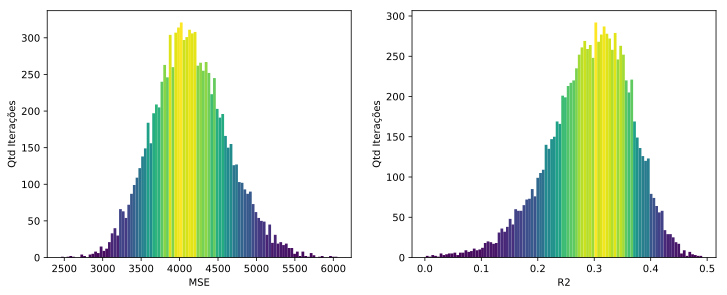

In [21]:
plt.subplot(221)
#Deixar Histograma colorido
N, bins, patches = plt.hist(mse_list_ica, bins = 100, orientation = 'vertical')
fracs = N/N.max()
norm = matplotlib.colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
#fim comando para deixar colorido
plt.xlabel('MSE')
plt.ylabel('Qtd Iterações')

plt.subplot(222)
#Deixar Histograma colorido
N, bins, patches = plt.hist(r_2_list_ica, bins = 100, orientation = 'vertical')
fracs = N/N.max()
norm = matplotlib.colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
#fim comando para deixar colorido
plt.xlabel('R2')
plt.ylabel('Qtd Iterações')


plt.show()

#### Isomap

In [22]:
mse_list_isomap = []
r_2_list_isomap = []
for x in range(0, 10000):
    X_train_isomap, X_test_isomap, y_train_isomap, y_test_isomap = train_test_split(isomap, y, test_size = .20)
    reg = LinearRegression().fit(X_train_isomap, y_train_isomap)
    y_pred_isomap = reg.predict(X_test_isomap)
    
    mse_list_isomap.append(mse(y_pred_isomap, y_test_isomap))
    r_2_list_isomap.append(r2(y_test_isomap, y_pred_isomap))

In [23]:
cont_neg = 0
for index, i in enumerate(r_2_list_isomap):
    if i < 0:
        cont_neg += 1
        print("índice da lista c/ valor negativo: {}".format(index))
        r_2_list_isomap[index] *= -1 
print("Total de R2 com valores negativos: {}".format(cont_neg))

índice da lista c/ valor negativo: 0
índice da lista c/ valor negativo: 9
índice da lista c/ valor negativo: 15
índice da lista c/ valor negativo: 26
índice da lista c/ valor negativo: 28
índice da lista c/ valor negativo: 31
índice da lista c/ valor negativo: 33
índice da lista c/ valor negativo: 35
índice da lista c/ valor negativo: 36
índice da lista c/ valor negativo: 44
índice da lista c/ valor negativo: 53
índice da lista c/ valor negativo: 57
índice da lista c/ valor negativo: 59
índice da lista c/ valor negativo: 64
índice da lista c/ valor negativo: 68
índice da lista c/ valor negativo: 69
índice da lista c/ valor negativo: 71
índice da lista c/ valor negativo: 75
índice da lista c/ valor negativo: 86
índice da lista c/ valor negativo: 101
índice da lista c/ valor negativo: 102
índice da lista c/ valor negativo: 115
índice da lista c/ valor negativo: 116
índice da lista c/ valor negativo: 118
índice da lista c/ valor negativo: 122
índice da lista c/ valor negativo: 123
índice 

In [24]:
print('min MSE: {}'.format(round(min(mse_list_isomap), 4)))
print('max MSE: {}'.format(round(max(mse_list_isomap), 4)))
print('mean MSE: {}'.format(round(mean(mse_list_isomap), 4)))
print('median MSE: {}'.format(round(median(mse_list_isomap), 4)))
print('mode MSE: {}'.format(round(mode(mse_list_isomap).mode[0], 4)))
print('var MSE: {}'.format(round(var(mse_list_isomap), 4)))
print('std MSe: {}'.format(round(std(mse_list_isomap), 4)))
print("\n")
print('min R2: {}'.format(round(min(r_2_list_isomap), 4)))
print('max R2: {}'.format(round(max(r_2_list_isomap), 4)))
print('mean R2: {}'.format(round(mean(r_2_list_isomap), 4)))
print('median R2: {}'.format(round(median(r_2_list_isomap), 4)))
print('mode R2: {}'.format(round(mode(r_2_list_isomap).mode[0], 4)))
print('var R2: {}'.format(round(var(r_2_list_isomap), 4)))
print('std R2: {}'.format(round(std(r_2_list_isomap), 4)))

min MSE: 3656.9091
max MSE: 7903.7466
mean MSE: 5618.8079
median MSE: 5607.8652
mode MSE: 3656.9091
var MSE: 332159.505
std MSe: 576.3328


min R2: 0.0
max R2: 0.2855
mean R2: 0.0549
median R2: 0.0524
mode R2: 0.0
var R2: 0.0011
std R2: 0.0337


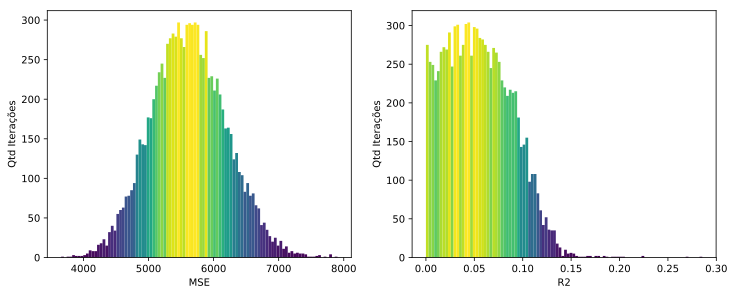

In [25]:
plt.subplot(221)
#Deixar Histograma colorido
N, bins, patches = plt.hist(mse_list_isomap, bins = 100, orientation = 'vertical')
fracs = N/N.max()
norm = matplotlib.colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
#fim comando para deixar colorido
plt.xlabel('MSE')
plt.ylabel('Qtd Iterações')

plt.subplot(222)
#Deixar Histograma colorido
N, bins, patches = plt.hist(r_2_list_isomap, bins = 100, orientation = 'vertical')
fracs = N/N.max()
norm = matplotlib.colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
#fim comando para deixar colorido
plt.xlabel('R2')
plt.ylabel('Qtd Iterações')


plt.show()

#### TSNE

In [26]:
mse_list_tsne = []
r_2_list_tsne = []

for x in range(0, 10000):
    X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(tsne, y, test_size = .20)
    reg = LinearRegression().fit(X_train_tsne, y_train_tsne)
    y_pred_tsne = reg.predict(X_test_tsne)
    
    mse_list_tsne.append(mse(y_pred_tsne, y_test_tsne))
    r_2_list_tsne.append(r2(y_test_tsne, y_pred_tsne))

In [27]:
len(r_2_list_tsne)

10000

In [28]:
cont_neg = 0
for index, i in enumerate(r_2_list_tsne):
    if i < 0:
        cont_neg += 1
        print("índice da lista c/ valor negativo: {}".format(index))
        r_2_list_tsne[index] *= -1 
print("Total de R2 com valores negativos: {}".format(cont_neg))

índice da lista c/ valor negativo: 4
índice da lista c/ valor negativo: 51
índice da lista c/ valor negativo: 67
índice da lista c/ valor negativo: 84
índice da lista c/ valor negativo: 139
índice da lista c/ valor negativo: 162
índice da lista c/ valor negativo: 167
índice da lista c/ valor negativo: 191
índice da lista c/ valor negativo: 197
índice da lista c/ valor negativo: 223
índice da lista c/ valor negativo: 240
índice da lista c/ valor negativo: 281
índice da lista c/ valor negativo: 392
índice da lista c/ valor negativo: 396
índice da lista c/ valor negativo: 424
índice da lista c/ valor negativo: 470
índice da lista c/ valor negativo: 471
índice da lista c/ valor negativo: 501
índice da lista c/ valor negativo: 517
índice da lista c/ valor negativo: 572
índice da lista c/ valor negativo: 574
índice da lista c/ valor negativo: 630
índice da lista c/ valor negativo: 653
índice da lista c/ valor negativo: 660
índice da lista c/ valor negativo: 722
índice da lista c/ valor negat

In [29]:
print('min MSE: {}'.format(round(min(mse_list_tsne), 4)))
print('max MSE: {}'.format(round(max(mse_list_tsne), 4)))
print('mean MSE: {}'.format(round(mean(mse_list_tsne), 4)))
print('median MSE: {}'.format(round(median(mse_list_tsne), 4)))
print('mode MSE: {}'.format(round(mode(mse_list_tsne).mode[0], 4)))
print('var MSE: {}'.format(round(var(mse_list_tsne), 4)))
print('std MSe: {}'.format(round(std(mse_list_tsne), 4)))
print("\n")
print('min R2: {}'.format(round(min(r_2_list_tsne), 4)))
print('max R2: {}'.format(round(max(r_2_list_tsne), 4)))
print('mean R2: {}'.format(round(mean(r_2_list_tsne), 4)))
print('median R2: {}'.format(round(median(r_2_list_tsne), 4)))
print('mode R2: {}'.format(round(mode(r_2_list_tsne).mode[0], 4)))
print('var R2: {}'.format(round(var(r_2_list_tsne), 4)))
print('std R2: {}'.format(round(std(r_2_list_tsne), 4)))

min MSE: 3298.1586
max MSE: 7535.6296
mean MSE: 5223.4507
median MSE: 5208.8722
mode MSE: 3298.1586
var MSE: 312723.444
std MSe: 559.2168


min R2: 0.0001
max R2: 0.2751
mean R2: 0.1126
median R2: 0.1144
mode R2: 0.0001
var R2: 0.003
std R2: 0.0544


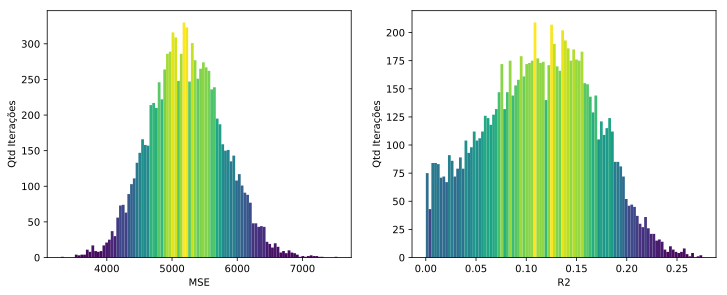

In [30]:
plt.subplot(221)
#Deixar Histograma colorido
N, bins, patches = plt.hist(mse_list_tsne, bins = 100, orientation = 'vertical')
fracs = N/N.max()
norm = matplotlib.colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
#fim comando para deixar colorido
plt.xlabel('MSE')
plt.ylabel('Qtd Iterações')

plt.subplot(222)
#Deixar Histograma colorido
N, bins, patches = plt.hist(r_2_list_tsne, bins = 100, orientation = 'vertical')
fracs = N/N.max()
norm = matplotlib.colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
#fim comando para deixar colorido
plt.xlabel('R2')
plt.ylabel('Qtd Iterações')


plt.show()

### Comparando modelos de Regressão

Exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada em cada caso.

In [31]:
def avaliador(x, y, algo, titulo):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .20)
    reg = algo.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    print('mean squared error: {} '.format(round(mse(y_pred, y_test), 2)))
    print('R2: {}'.format(round(r2(y_test, y_pred), 4)))  
    
    params = {'figure.figsize': [12, 10], 
          'axes.labelsize': 10,
          'axes.titlesize':10, 
          'font.size': 10,
          'legend.fontsize': 10, 
          'xtick.labelsize': 10, 
          'ytick.labelsize': 10
         }

    plt.rcParams.update(params)

    plt.subplot(221)
    plt.scatter(X_train,y_train)
    plt.scatter(X_test,y_test, c = 'orange')
    plt.plot(X_test, y_pred, 'r')
    plt.legend(['Curva de regressão','Dados de treino', 'Dados de teste'])
    plt.title(titulo)

    plt.show()


#### Least Squares

mean squared error: 4758.39 
R2: 0.3202


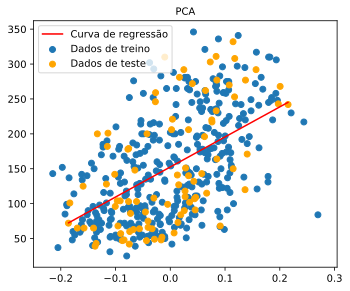

mean squared error: 3674.39 
R2: 0.416


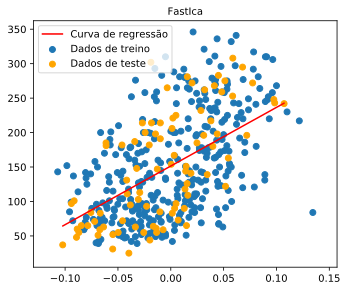

mean squared error: 5312.83 
R2: 0.0556


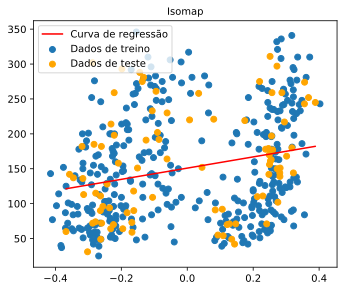

mean squared error: 5328.43 
R2: 0.1718


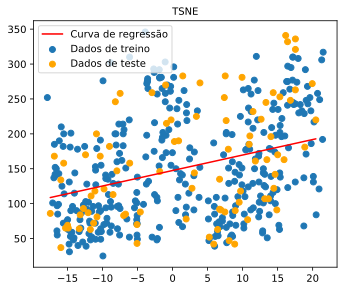

In [32]:
from sklearn.linear_model import LinearRegression

#PCA
avaliador(pca, y, LinearRegression(), 'PCA')

#FastIca
avaliador(fast_ica, y, LinearRegression(), 'FastIca')

#Isomap
avaliador(isomap, y, LinearRegression(), 'Isomap')

#TSNE
avaliador(tsne, y, LinearRegression(), 'TSNE')

#### Ridge

mean squared error: 4609.12 
R2: 0.1883


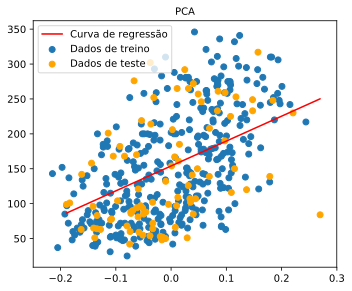

mean squared error: 4917.96 
R2: 0.2022


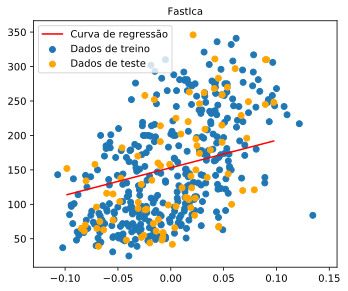

mean squared error: 5201.69 
R2: 0.033


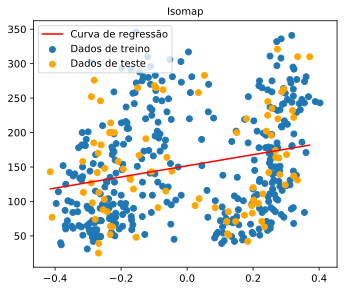

mean squared error: 5410.13 
R2: 0.2035


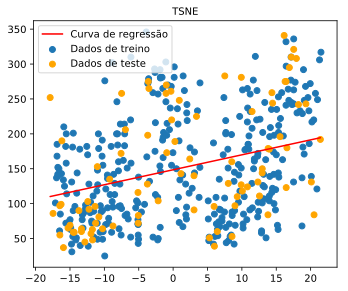

In [33]:
from sklearn.linear_model import Ridge

#PCA
avaliador(pca, y, Ridge(), 'PCA')

#FastIca
avaliador(fast_ica, y, Ridge(), 'FastIca')

#Isomap
avaliador(isomap, y, Ridge(), 'Isomap')

#TSNE
avaliador(tsne, y, Ridge(), 'TSNE')

#### Lasso

mean squared error: 3850.93 
R2: 0.2989


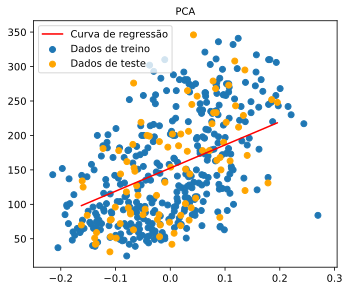

mean squared error: 4480.93 
R2: 0.2032


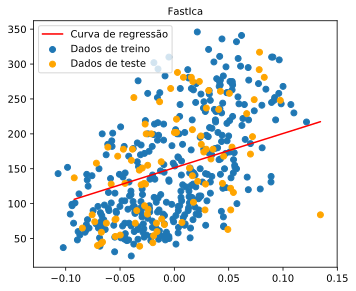

mean squared error: 5557.57 
R2: 0.0032


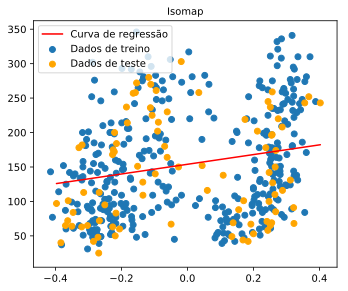

mean squared error: 4980.35 
R2: 0.1792


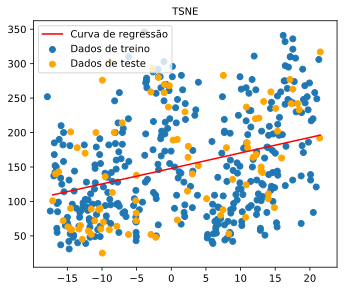

In [34]:
from sklearn.linear_model import Lasso

#PCA
avaliador(pca, y, Lasso(), 'PCA')

#FastIca
avaliador(fast_ica, y, Lasso(), 'FastIca')

#Isomap
avaliador(isomap, y, Lasso(), 'Isomap')

#TSNE
avaliador(tsne, y, Lasso(), 'TSNE')

#### Lasso LARS

mean squared error: 4527.53 
R2: 0.2618


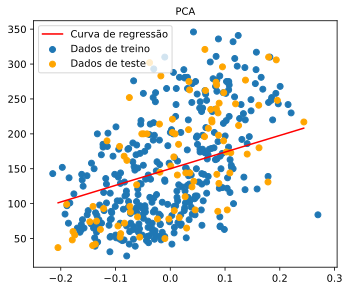

mean squared error: 3799.92 
R2: 0.2615


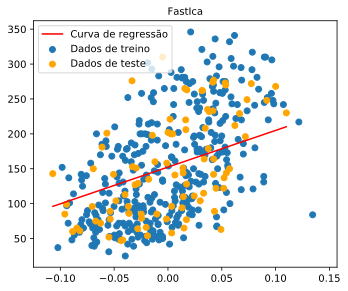

mean squared error: 5314.31 
R2: 0.0028


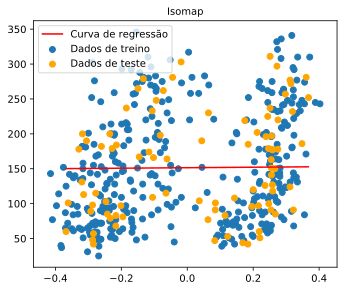

mean squared error: 6218.21 
R2: 0.0496


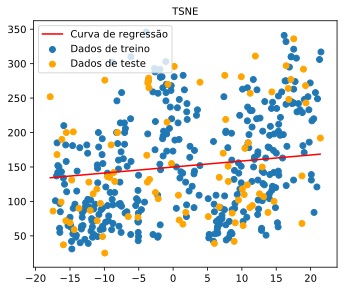

In [35]:
from sklearn.linear_model import LassoLars

#PCA
avaliador(pca, y, LassoLars(), 'PCA')

#FastIca
avaliador(fast_ica, y, LassoLars(), 'FastIca')

#Isomap
avaliador(isomap, y, LassoLars(), 'Isomap')

#TSNE
avaliador(tsne, y, LassoLars(), 'TSNE')

#### Bayesian Ridge

mean squared error: 4670.04 
R2: 0.3672


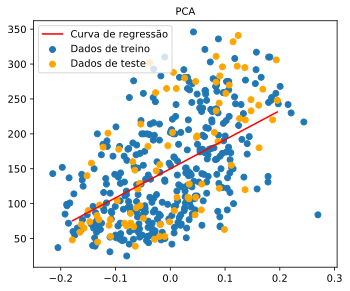

mean squared error: 5009.23 
R2: 0.2573


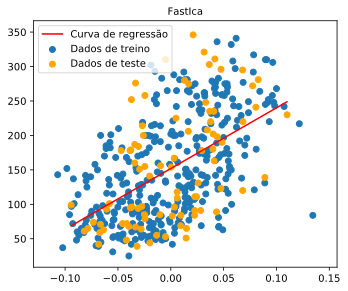

mean squared error: 5065.09 
R2: 0.0077


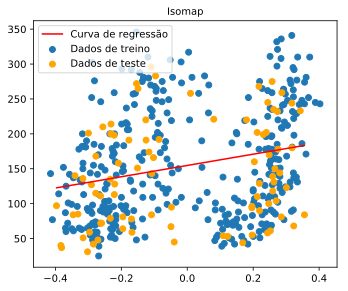

mean squared error: 5437.39 
R2: 0.0472


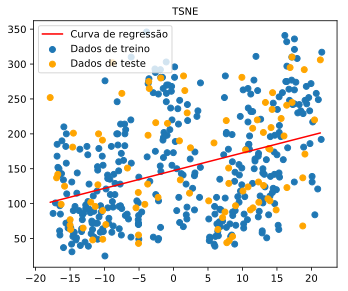

In [36]:
from sklearn.linear_model import BayesianRidge

#PCA
avaliador(pca, y, BayesianRidge(), 'PCA')

#FastIca
avaliador(fast_ica, y, BayesianRidge(), 'FastIca')

#Isomap
avaliador(isomap, y, BayesianRidge(), 'Isomap')

#TSNE
avaliador(tsne, y, BayesianRidge(), 'TSNE')

#### RANSAC

mean squared error: 7353.63 
R2: -0.3592


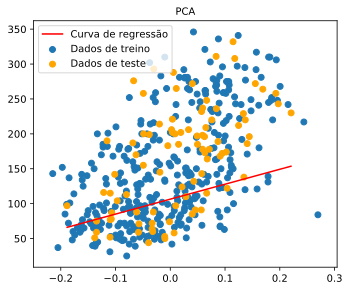

mean squared error: 5612.41 
R2: 0.1937


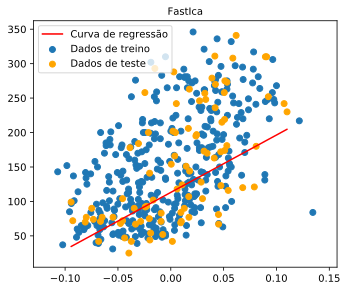

mean squared error: 5840.67 
R2: -0.0859


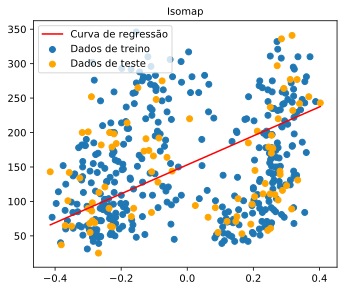

mean squared error: 6907.99 
R2: -0.2052


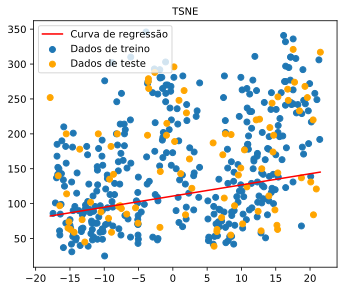

In [37]:
from sklearn.linear_model import RANSACRegressor

#PCA
avaliador(pca, y, RANSACRegressor(), 'PCA')

#FastIca
avaliador(fast_ica, y, RANSACRegressor(), 'FastIca')

#Isomap
avaliador(isomap, y, RANSACRegressor(), 'Isomap')

#TSNE
avaliador(tsne, y, RANSACRegressor(), 'TSNE')

#### Theil-Sen

mean squared error: 4248.31 
R2: 0.332


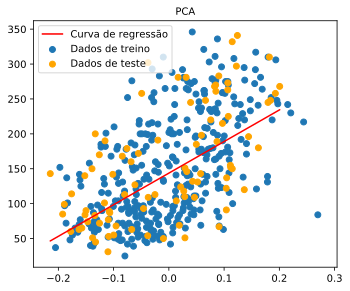

mean squared error: 4670.11 
R2: 0.3526


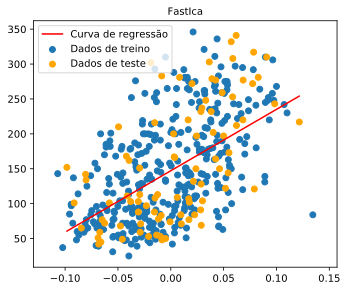

mean squared error: 6760.57 
R2: -0.0023


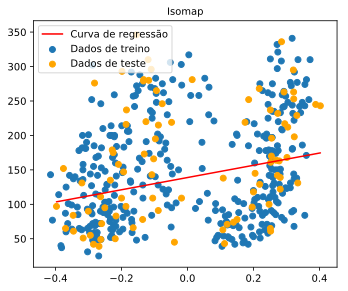

mean squared error: 4821.96 
R2: 0.1552


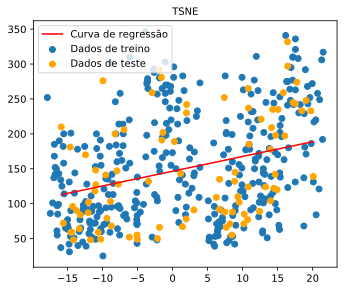

In [38]:
from sklearn.linear_model import TheilSenRegressor

#PCA
avaliador(pca, y, TheilSenRegressor(), 'PCA')

#FastIca
avaliador(fast_ica, y, TheilSenRegressor(), 'FastIca')

#Isomap
avaliador(isomap, y, TheilSenRegressor(), 'Isomap')

#TSNE
avaliador(tsne, y, TheilSenRegressor(), 'TSNE')

### Gráfico geral comparativo

Em uma mesma figura, mostre novamente o gráfico de dispersão dos dados e plote cada um dos modelos gerados utilizando cada técnica deste laboratório. Atente-se a fazer com que o gráfico seja suficientemente autoexplicativo, então utilize diferentes cores, insira uma legenda etc.

In [39]:
def avaliador_2(X_train, X_test, y_train, algoritmo):
    reg = algoritmo.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    return y_pred

## PCA

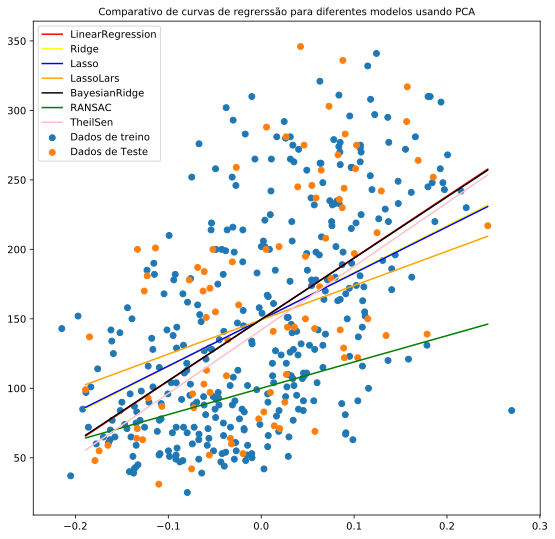

In [40]:
X_train, X_test, y_train, y_test = train_test_split(pca, y, test_size = .20)

    
params = {'figure.figsize': [20, 20], 
          'axes.labelsize': 10,
          'axes.titlesize':10, 
          'font.size': 10,
          'legend.fontsize': 10, 
          'xtick.labelsize': 10, 
          'ytick.labelsize': 10
         }

plt.rcParams.update(params)

#Gráfico para o PCA
plt.subplot(221)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
#Least Squares
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, LinearRegression()), 'red')
#Ridge
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, Ridge()), 'yellow')
#Lasso
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, Lasso()), 'blue')
#Lasso LARS
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, LassoLars()), 'orange')
#Bayesian RIDGE
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, BayesianRidge()), 'black')
#RANSAC
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, RANSACRegressor()), 'green')
#Theil-sen
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, TheilSenRegressor()), 'pink')

plt.legend(['LinearRegression','Ridge', 'Lasso', 'LassoLars', 'BayesianRidge', 'RANSAC', 'TheilSen', 'Dados de treino', 'Dados de Teste'])
plt.title('Comparativo de curvas de regrerssão para diferentes modelos usando PCA')

plt.show()

## FastICA

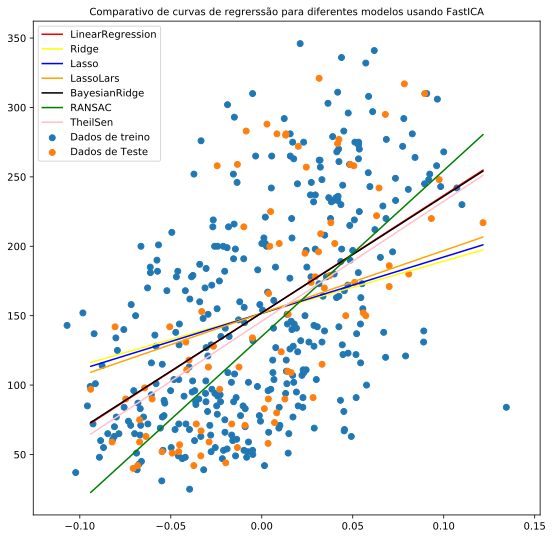

In [41]:
X_train, X_test, y_train, y_test = train_test_split(fast_ica, y, test_size = .20)


params = {'figure.figsize': [20, 20], 
          'axes.labelsize': 10,
          'axes.titlesize':10, 
          'font.size': 10,
          'legend.fontsize': 10, 
          'xtick.labelsize': 10, 
          'ytick.labelsize': 10
         }

plt.rcParams.update(params)

#Gráfico para o PCA
plt.subplot(221)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
#Least Squares
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, LinearRegression()), 'red')
#Ridge
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, Ridge()), 'yellow')
#Lasso
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, Lasso()), 'blue')
#Lasso LARS
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, LassoLars()), 'orange')
#Bayesian RIDGE
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, BayesianRidge()), 'black')
#RANSAC
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, RANSACRegressor()), 'green')
#Theil-sen
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, TheilSenRegressor()), 'pink')

plt.legend(['LinearRegression','Ridge', 'Lasso', 'LassoLars', 'BayesianRidge', 'RANSAC', 'TheilSen', 'Dados de treino', 'Dados de Teste'])
plt.title('Comparativo de curvas de regrerssão para diferentes modelos usando FastICA')

plt.show()

## Isomap

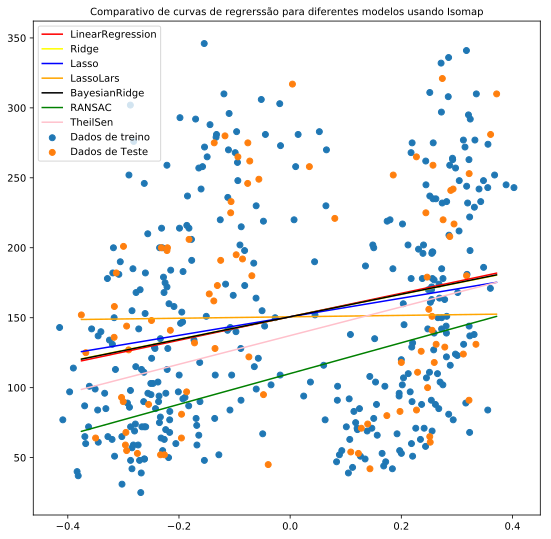

In [42]:
X_train, X_test, y_train, y_test = train_test_split(isomap, y, test_size = .20)


params = {'figure.figsize': [20, 20], 
          'axes.labelsize': 10,
          'axes.titlesize':10, 
          'font.size': 10,
          'legend.fontsize': 10, 
          'xtick.labelsize': 10, 
          'ytick.labelsize': 10
         }

plt.rcParams.update(params)

#Gráfico para o PCA
plt.subplot(221)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
#Least Squares
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, LinearRegression()), 'red')
#Ridge
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, Ridge()), 'yellow')
#Lasso
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, Lasso()), 'blue')
#Lasso LARS
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, LassoLars()), 'orange')
#Bayesian RIDGE
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, BayesianRidge()), 'black')
#RANSAC
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, RANSACRegressor()), 'green')
#Theil-sen
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, TheilSenRegressor()), 'pink')

plt.legend(['LinearRegression','Ridge', 'Lasso', 'LassoLars', 'BayesianRidge', 'RANSAC', 'TheilSen', 'Dados de treino', 'Dados de Teste'])
plt.title('Comparativo de curvas de regrerssão para diferentes modelos usando Isomap')

plt.show()

## TSNE

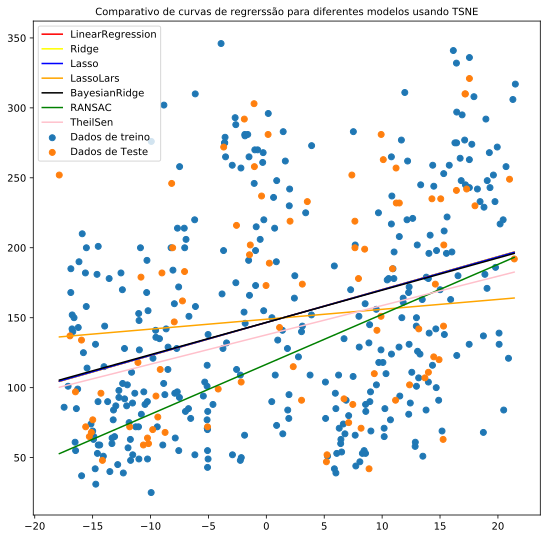

In [43]:
X_train, X_test, y_train, y_test = train_test_split(tsne, y, test_size = .20)


params = {'figure.figsize': [20, 20], 
          'axes.labelsize': 10,
          'axes.titlesize':10, 
          'font.size': 10,
          'legend.fontsize': 10, 
          'xtick.labelsize': 10, 
          'ytick.labelsize': 10
         }

plt.rcParams.update(params)

#Gráfico para o PCA
plt.subplot(221)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
#Least Squares
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, LinearRegression()), 'red')
#Ridge
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, Ridge()), 'yellow')
#Lasso
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, Lasso()), 'blue')
#Lasso LARS
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, LassoLars()), 'orange')
#Bayesian RIDGE
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, BayesianRidge()), 'black')
#RANSAC
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, RANSACRegressor()), 'green')
#Theil-sen
plt.plot(X_test, avaliador_2(X_train, X_test, y_train, TheilSenRegressor()), 'pink')

plt.legend(['LinearRegression','Ridge', 'Lasso', 'LassoLars', 'BayesianRidge', 'RANSAC', 'TheilSen', 'Dados de treino', 'Dados de Teste'])
plt.title('Comparativo de curvas de regrerssão para diferentes modelos usando TSNE')

plt.show()